In [4]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
from sqlalchemy import func
from sqlalchemy import desc

In [6]:
 import datetime as dt

In [3]:
import os
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
import sqlalchemy

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [10]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
# Calculate the date 1 year ago from today
yearago=(dt.date.today() - dt.timedelta(days=365*2))

In [15]:
yearago.strftime('%Y/%m/%d')

'2016/08/28'

In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>yearago).all()


In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results)
df.set_index('date')
df.head()

,date,prcp
0,2016-08-29,0.00
1,2016-08-30,0.00
2,2016-08-31,0.13
3,2016-09-01,0.00
4,2016-09-02,0.00


In [18]:
#Sort the dataframe by date
df.sort_values(by='date',ascending=False)

,date,prcp
2190,2017-08-23,0.45
1500,2017-08-23,0.08
990,2017-08-23,0.00
354,2017-08-23,0.00
1499,2017-08-22,0.00
2189,2017-08-22,0.50
353,2017-08-22,0.00
2188,2017-08-21,0.56
989,2017-08-21,0.02
1498,2017-08-21,NaN


<IPython.core.display.Javascript object>


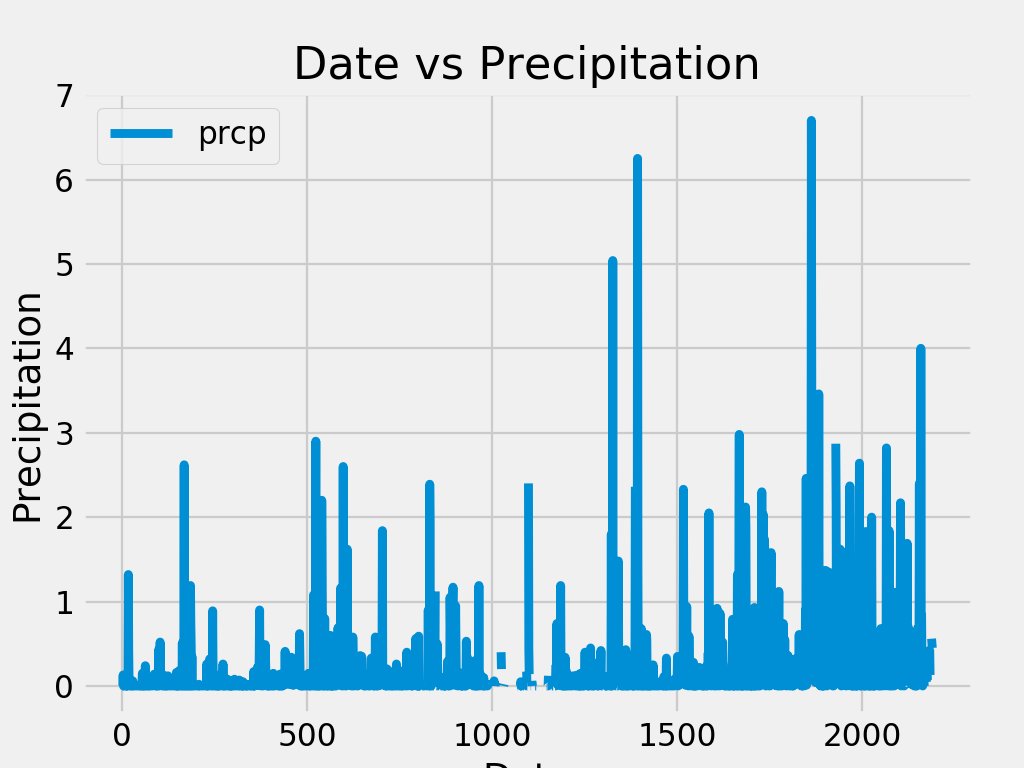

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line()
plt.title("Date vs Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Date")
fig.tight_layout()
plt.savefig("Trip_Date_pres.png")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    1985.000000
mean        0.172383
std         0.453252
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [21]:
 # How many stations are available in this dataset?
no_stations=session.query(Station.id).count()
no_stations

9

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
r1=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(desc(func.count(Measurement.tobs))).all()
r1

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
st_id=r1[0][0]
minmaxavg=session.query(
    func.min(Measurement.tobs).label("min_temperature"), 
    func.max(Measurement.tobs).label("max_temperature"), 
    func.avg(Measurement.tobs).label("avg_temperature")
).filter(Measurement.station==st_id).one()
minmaxavg

(54.0, 85.0, 71.66378066378067)

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tem= session.query(Measurement.date,Measurement.tobs).filter(Measurement.station==st_id and Measurement.date>yearago).all()
tem

[('2010-01-01', 70.0),
 ('2010-01-02', 62.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 75.0),
 ('2010-01-05', 74.0),
 ('2010-01-06', 76.0),
 ('2010-01-07', 69.0),
 ('2010-01-08', 66.0),
 ('2010-01-09', 70.0),
 ('2010-01-10', 75.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 60.0),
 ('2010-01-13', 61.0),
 ('2010-01-14', 68.0),
 ('2010-01-15', 64.0),
 ('2010-01-16', 66.0),
 ('2010-01-17', 67.0),
 ('2010-01-18', 70.0),
 ('2010-01-19', 67.0),
 ('2010-01-20', 67.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 60.0),
 ('2010-01-23', 75.0),
 ('2010-01-24', 75.0),
 ('2010-01-25', 65.0),
 ('2010-01-26', 75.0),
 ('2010-01-27', 69.0),
 ('2010-01-28', 67.0),
 ('2010-01-29', 66.0),
 ('2010-01-30', 69.0),
 ('2010-01-31', 72.0),
 ('2010-02-01', 67.0),
 ('2010-02-02', 65.0),
 ('2010-02-03', 64.0),
 ('2010-02-04', 67.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 68.0),
 ('2010-02-07', 69.0),
 ('2010-02-08', 66.0),
 ('2010-02-09', 69.0),
 ('2010-02-10', 61.0),
 ('2010-02-11', 71.0),
 ('2010-02-12', 70.0),
 ('2010-02-

In [25]:
df2=pd.DataFrame(tem)
df2.head()

,date,tobs
0,2010-01-01,70.0
1,2010-01-02,62.0
2,2010-01-03,74.0
3,2010-01-04,75.0
4,2010-01-05,74.0


<IPython.core.display.Javascript object>


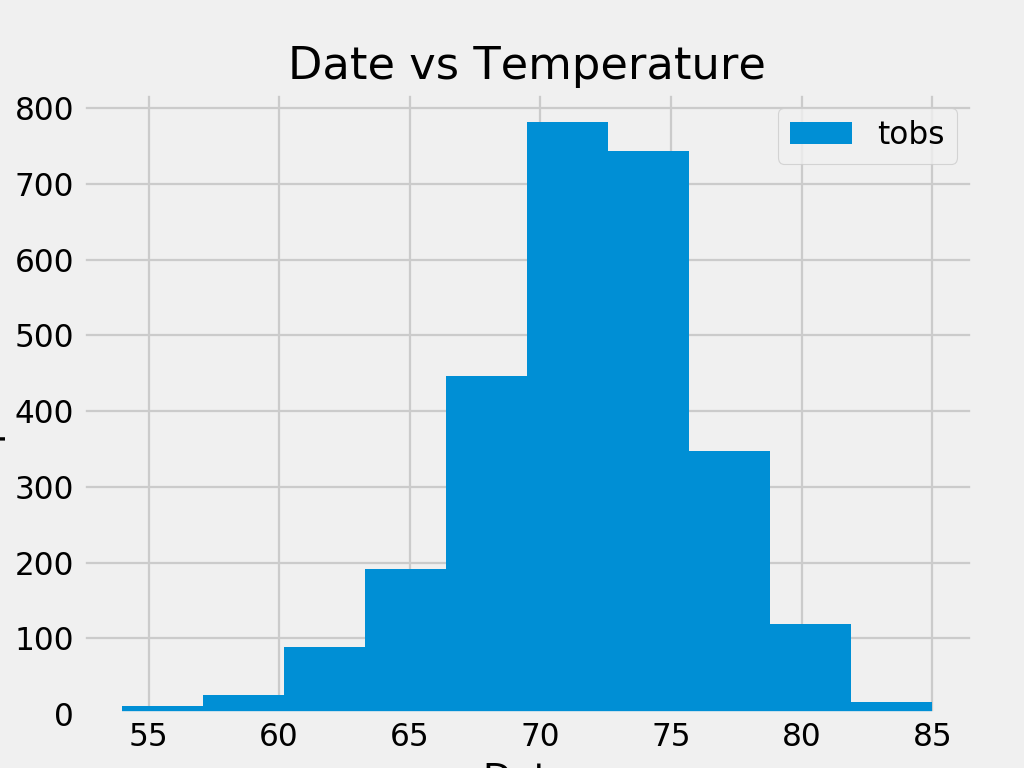

In [80]:
df2.plot.hist()
plt.title("Date vs Temperature")
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.savefig("Date_vs_temp.png")
plt.show()

In [29]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(session, start_date, end_date):
    return session.query(
        func.min(Measurement.tobs), 
        func.avg(Measurement.tobs), 
        func.max(Measurement.tobs)
    ).filter(
        Measurement.date >= start_date
    ).filter(
        Measurement.date <= end_date
    ).all()


In [75]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
x = calc_temps(session, '2017-02-28', '2017-03-05')
x

[(64.0, 72.02777777777777, 78.0)]

<IPython.core.display.Javascript object>


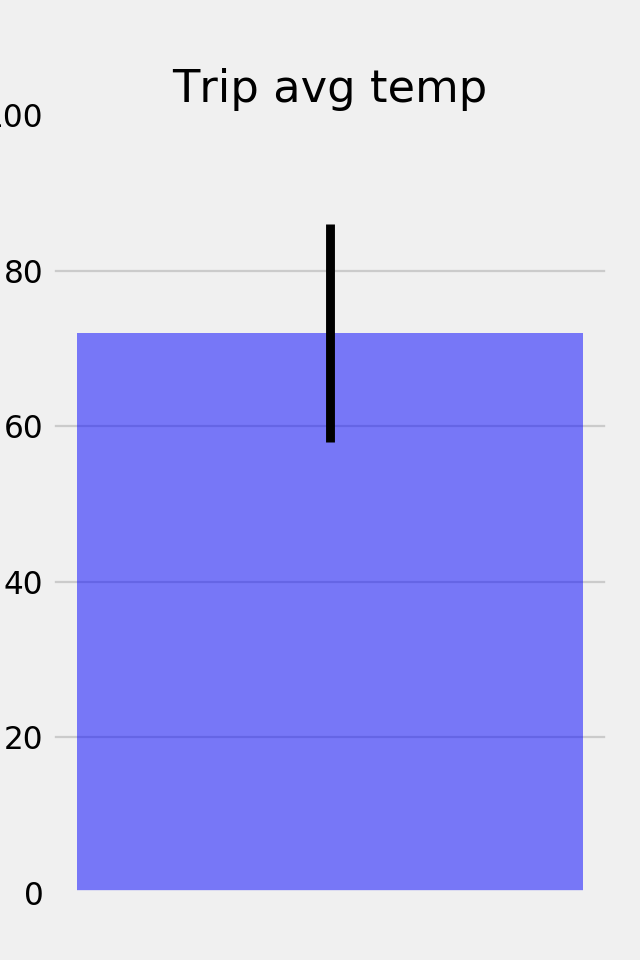

In [76]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,6))
plt.bar(1,height=x[0][1],yerr=x[0][2]-x[0][0],width=0.0001, alpha=0.5,color='blue')
plt.title("Trip avg temp")
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp(F)")
plt.savefig("Trip_avg_tem.png")
plt.show()

In [77]:
 # Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).group_by(Measurement.station).filter(Measurement.date <= '2017-03-05').filter(Measurement.date >= '2017-02-28').order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  42.480000000000004),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  40.05),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  36.629999999999995),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  26.820000000000014),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  24.660000000000004),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  20.880000000000003),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  10.440000000000001)]

In [16]:
#Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

app = Flask(__name__)

@app.route("/api/v1.0/precipitation")
def prcps():
    prcp_results = session.query(Measurement.date, Measurement.prcp).all()
    prcp_dict={}
    for prcp in prcp_results:
           dates=prcp.date
           precipitation=prcp.prcp
           prcp_dict.update({dates:precipitation})
    return(jsonify(prcp_dict))


@app.route("/api/v1.0/stations")
def stations():
    station_results = session.query(Station.station).all()
    all_stations = list(np.ravel(station_results))
    return jsonify(all_stations)

@app.route("/api/v1.0/tobs")
def tobs():
    tob_results = session.query(Measurement.tobs).filter(Measurement.date >= 2017-8-23).all()
    all_tobs = list(np.ravel(tob_results))
    return jsonify(all_tobs)
  

@app.route("/api/v1.0/start/<start>")
def start(start):
    results = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start).all())
    return jsonify(
    {'min temp': results['tobs'].min(),
    'ave temp': results['tobs'].mean(),
    'max temp': results['tobs'].max()})

@app.route("/api/v1.0/start_end/<start>/<end>")
def start_end(start,end):
    combine_results = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all())
    return jsonify({'min temp': combine_results['tobs'].min(),
                   'ave temp': combine_results['tobs'].mean(), 
                  'max temp': combine_results['tobs'].max()})